# Don't Get Kicked!
**Predict if a car purchased at auction is a lemon**

One of the biggest challenges of an auto dealership purchasing a used car at an auto auction is the risk of that the vehicle might have serious issues that prevent it from being sold to customers. The auto community calls these unfortunate purchases "kicks".

Kicked cars often result when there are tampered odometers, mechanical issues the dealer is not able to address, issues with getting the vehicle title from the seller, or some other unforeseen problem. Kick cars can be very costly to dealers after transportation cost, throw-away repair work, and market losses in reselling the vehicle.

Modelers who can figure out which cars have a higher risk of being kick can provide real value to dealerships trying to provide the best inventory selection possible to their customers.

**The challenge here is to predict if the car purchased at the Auction is a Kick (bad buy).**

## Loading the dataset

In [1]:
url = 'https://www.kaggle.com/competitions/DontGetKicked/data'

import opendatasets as od
od.download(url)

Skipping, found downloaded files in "./DontGetKicked" (use force=True to force download)


In [2]:
data_dir='./DontGetKicked/'

import pickle
import os
os.listdir(data_dir)

['training.zip',
 'training.csv',
 'test.zip',
 'example_entry.csv',
 'Carvana_Data_Dictionary.txt',
 'test.csv']

## Data Preparation and Cleaning

In [3]:
import pandas as pd
dataset = pd.read_csv(data_dir+"/training.csv")
dataset.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              72983 non-null  int64  
 1   IsBadBuy                           72983 non-null  int64  
 2   PurchDate                          72983 non-null  object 
 3   Auction                            72983 non-null  object 
 4   VehYear                            72983 non-null  int64  
 5   VehicleAge                         72983 non-null  int64  
 6   Make                               72983 non-null  object 
 7   Model                              72983 non-null  object 
 8   Trim                               70623 non-null  object 
 9   SubModel                           72975 non-null  object 
 10  Color                              72975 non-null  object 
 11  Transmission                       72974 non-null  obj

### Data Cleaning

There could be some columns with missing datapoints. We will need find them out and address them accordingly. 

In [5]:
dataset.isna().sum()

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  2360
SubModel                                 8
Color                                    8
Transmission                             9
WheelTypeID                           3169
WheelType                             3174
VehOdo                                   0
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          315
MMRCurrentA

We see that 2 of the columns "PRIMEUNIT" and "AUCGUART" have too many datapoints missing. It would be better to drop them. Since the others have very less missing entries, we can drop those rows.

In [6]:
dataset = dataset.drop(columns=['PRIMEUNIT','AUCGUART','RefId'])

In [7]:
dataset.dropna(inplace=True)

In [8]:
dataset.isna().sum()

IsBadBuy                             0
PurchDate                            0
Auction                              0
VehYear                              0
VehicleAge                           0
Make                                 0
Model                                0
Trim                                 0
SubModel                             0
Color                                0
Transmission                         0
WheelTypeID                          0
WheelType                            0
VehOdo                               0
Nationality                          0
Size                                 0
TopThreeAmericanName                 0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
BYRNO                    

Now we see that there are no missing datapoints.

### Feature Engineering
We see that some of the columns have informations that could be converted to a useful format so that the model can easily understand it. We can perform feature engineering on it.

In [9]:
dataset['PurchDate'] = pd.to_datetime(dataset['PurchDate'])
dataset['PurchYear'] = dataset['PurchDate'].dt.year

## Exploratory Analysis and Visualization

Importing the necessary modules for plotting

In [10]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**1. Plotting the distribution of data with respect to years**

<AxesSubplot:xlabel='VehicleAge', ylabel='count'>

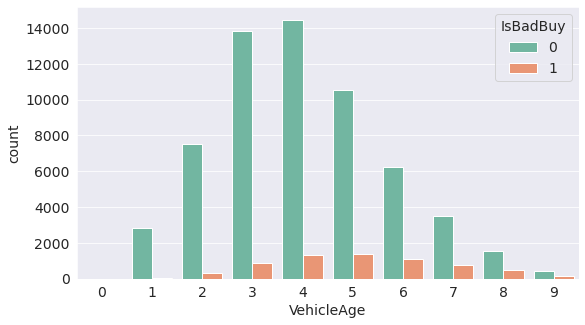

In [15]:
sns.countplot(data=datset, x='VehicleAge', hue='IsBadBuy',palette='Set2')

We see that the distribution is somewhat gaussian in nature.

**2. Plotting the distribution of colors of car sold**

<AxesSubplot:xlabel='Color', ylabel='count'>

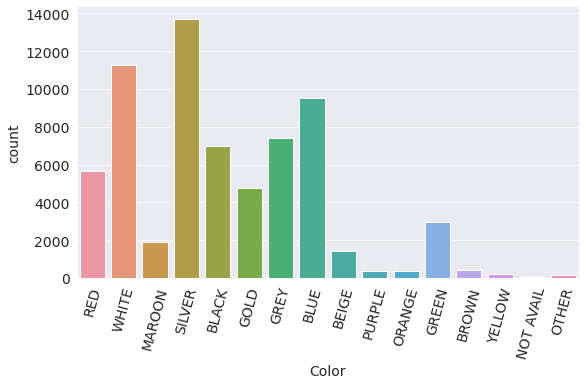

In [16]:
plt.xticks(rotation=75)
sns.countplot(data=datset, x='Color')

**2. Plotting the relation of IsBadBuy vs Make**

In [17]:
dataset.Make.value_counts().head(15)

CHEVROLET     16528
DODGE         12408
FORD          10694
CHRYSLER       8118
PONTIAC        3790
KIA            2285
NISSAN         1970
HYUNDAI        1710
SATURN         1680
JEEP           1555
TOYOTA         1102
MITSUBISHI      968
MAZDA           886
MERCURY         792
BUICK           676
Name: Make, dtype: int64

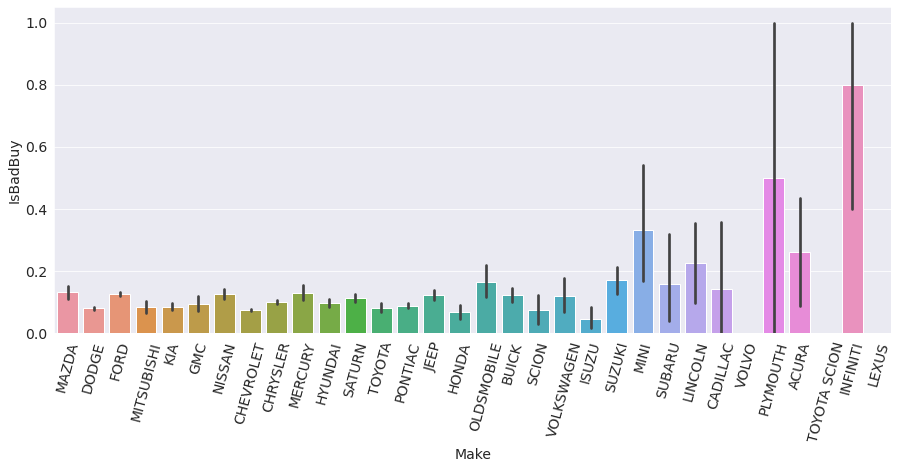

In [18]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=75)
sns.barplot(x=dataset['Make'],y=dataset['IsBadBuy'])

plt.show()

In [19]:
bad_make = dataset.groupby('Make')['IsBadBuy'].sum().sort_values(ascending=False)
bad_make.head(5)

Make
FORD         1356
CHEVROLET    1239
DODGE         999
CHRYSLER      805
PONTIAC       338
Name: IsBadBuy, dtype: int64

We see that these are the companies with most badbuys. But they are also the most selling companies and hence will have more cars auctioned.

**3. Plotting the relation of IsBadBuy vs Transmission**

In [20]:
dataset['Transmission'].unique()

array(['AUTO', 'MANUAL', 'Manual'], dtype=object)

In [21]:
df=dataset['Transmission'].replace('Manual','MANUAL')
df.unique()

array(['AUTO', 'MANUAL'], dtype=object)

<AxesSubplot:xlabel='Transmission', ylabel='IsBadBuy'>

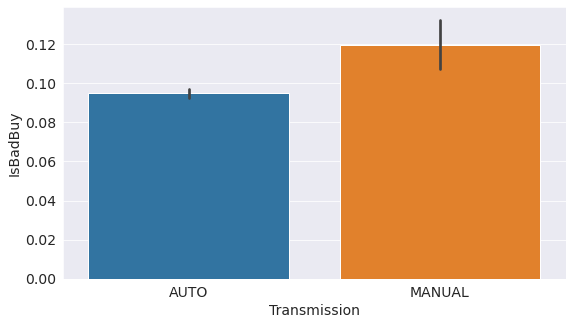

In [22]:
sns.barplot(x=df,y=dataset['IsBadBuy'])

We see that there is not much dependence on the transmission

**5. Plotting the relation of WheelType vs IsBadBuy**

<AxesSubplot:xlabel='WheelType', ylabel='IsBadBuy'>

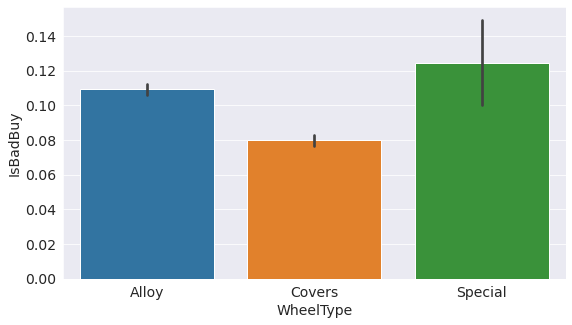

In [23]:
sns.barplot(x=dataset['WheelType'],y=dataset['IsBadBuy'])

**6. Plotting the graph of Vehicle Size vs IsBadBuy**

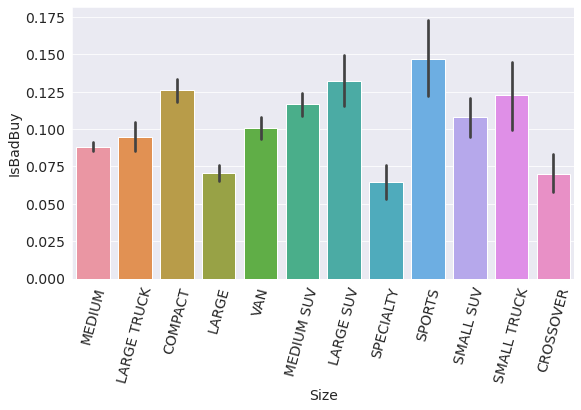

In [24]:
sns.barplot(x=dataset['Size'],y=dataset['IsBadBuy'])
plt.xticks(rotation=75)
plt.show()

We see that this is a useful data, but just visualization won't help much.

**6. Plotting the distribution of cars from different manufacturers**

<AxesSubplot:xlabel='TopThreeAmericanName', ylabel='IsBadBuy'>

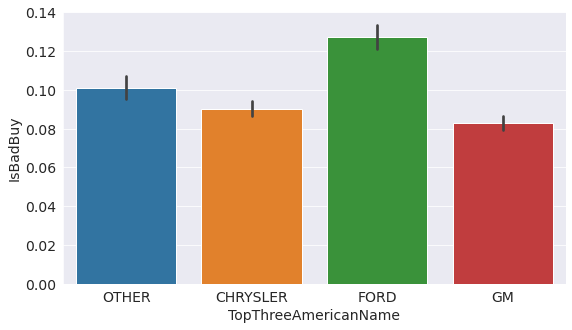

In [25]:
sns.barplot(x=dataset['TopThreeAmericanName'],y=dataset['IsBadBuy'])

We see that most of the cars in the auction is sold by the Top 3 American companies. This is one of the useful data for classification.

**7. Plotting the distribution of money spend on the aution vehicles**

<AxesSubplot:xlabel='VehBCost'>

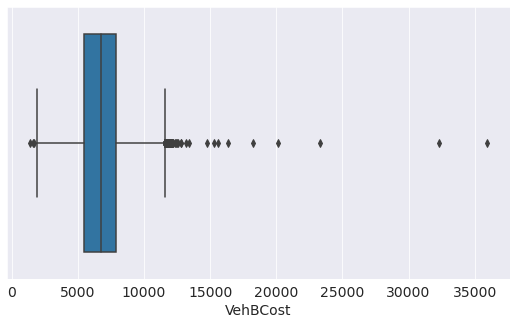

In [26]:
sns.boxplot(x=dataset['VehBCost'])

We see that most of the purchase is done in range of 6k to 8k.

## Preprocessing the Data

In [11]:
# from sklearn.metrics import f1_score,confusion_matrix
features = ['Auction',
            'VehicleAge',
            'Make',
            'Trim',
            'Color',
            'Transmission',
            'WheelType',
            'VehOdo',
            'Nationality',
            'Size',
            'MMRAcquisitionAuctionCleanPrice',
            'MMRAcquisitonRetailCleanPrice',
            'MMRCurrentAuctionCleanPrice',
            'MMRCurrentRetailCleanPrice',
            'VNST',
            'VehBCost',
            'IsOnlineSale',
            'WarrantyCost']

X = dataset[features]
y = dataset['IsBadBuy']

In [12]:
numerical_cols = X.select_dtypes(include=['int64','float64']).columns.to_list()
categorical_cols = X.select_dtypes(include='object').columns.to_list()

In [13]:
numerical_cols

['VehicleAge',
 'VehOdo',
 'MMRAcquisitionAuctionCleanPrice',
 'MMRAcquisitonRetailCleanPrice',
 'MMRCurrentAuctionCleanPrice',
 'MMRCurrentRetailCleanPrice',
 'VehBCost',
 'IsOnlineSale',
 'WarrantyCost']

In [14]:
categorical_cols

['Auction',
 'Make',
 'Trim',
 'Color',
 'Transmission',
 'WheelType',
 'Nationality',
 'Size',
 'VNST']

### Feature Scaling and One-hot encoding

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

inputs=pd.DataFrame()
inputs = pd.get_dummies(X[categorical_cols])
inputs[numerical_cols] = scaler.fit_transform(X[numerical_cols])

### Test-Train Splitting

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(inputs, y, test_size=0.2, random_state=42)

## Defining the Models

In [18]:
# Defining a Scoring function
def get_score(model):
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_valid,y_valid)
    
    print(f"Training Score : {train_score}")
    print(f"Validation Score : {test_score}\n")
    
def plot_score(func, parameter, values):
    train_list, valid_list = [], []
    for i in values:
        params={parameter:i}
        train_score, valid_score = func(**params)
        train_list.append(train_score)
        valid_list.append(valid_score)
    
    plt.title("Validation Curve")
    plt.ylabel("Score")
    plt.xlabel(parameter)
    plt.plot(values, valid_list, 'g-o', label='Validation')
    
    plt.legend()
    plt.show()

## 1. Light Gradient Boosting Model

In [19]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)

get_score(lgbm)

Training Score : 0.9060688271146128
Validation Score : 0.9023338784004757



We see that lightgbm with the default parameters is showing a good score and the model is not overfitting. We can still tune the hyperparameters to get the best out of it. Some of the important hyperparameters here are :
- max_depth - maximum depth of the tree
- num_iterations - number of iterations to be performed

### Hyperparameter Tuning for Gradient boosting

In [20]:
def test_params_lgbm(**params):
    model = LGBMClassifier(random_state=42, **params).fit(X_train, y_train)
    train_score = model.score(X_train,y_train)
    valid_score = model.score(X_valid,y_valid)
    return(train_score, valid_score)

**Tuning max_depth**

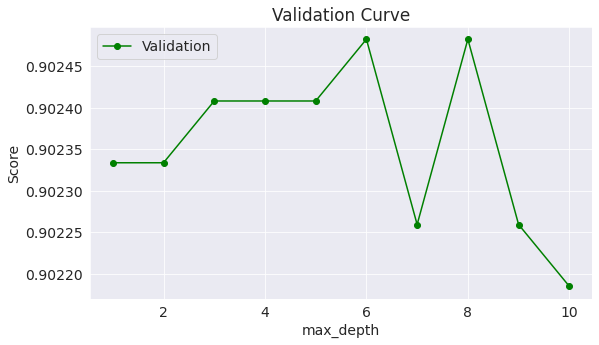

In [67]:
plot_score(test_params_lgbm, 'max_depth', [1,2,3,4,5,6,7,8,9,10])

We see that max_depth value of **6 and 8** performs the best

**Tuning num_iterations**

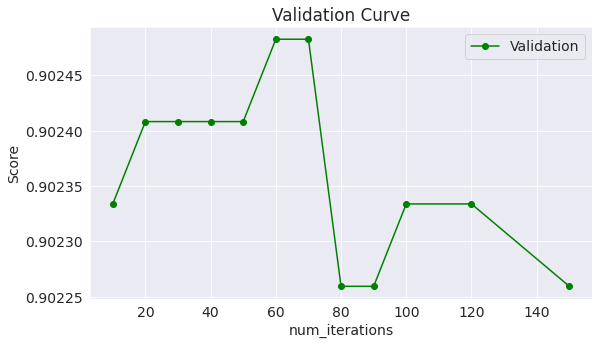

In [68]:
plot_score(test_params_lgbm, 'num_iterations', [10,20,30,40,50,60,70,80,90,100,120,150])

We see that the num_iterations has a max around **60 to 70**.

**Tuning learning rate**

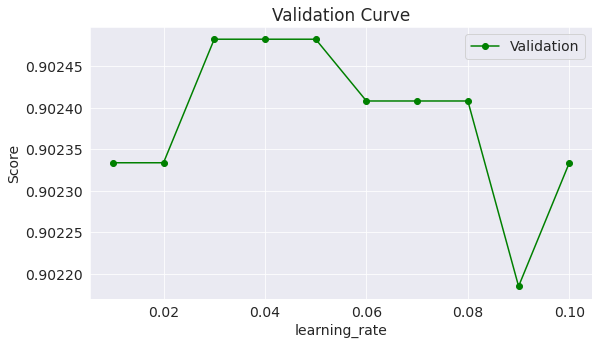

In [69]:
plot_score(test_params_lgbm, 'learning_rate', [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10])

The learning rate peaks at around **0.03 to 0.05**.

**Tuning the Model**

In [72]:
test_params_lgbm(max_depth=7, learning_rate=0.04, num_iterations=65)

(0.905028244388286, 0.9024082057380705)

In [21]:
test_params_lgbm(max_depth=7, learning_rate=0.04)

(0.9050654080570834, 0.9024825330756653)

### Saving the best model

In [22]:
lgbm = LGBMClassifier(random_state=42, max_depth=7, learning_rate=0.04)
lgbm.fit(X_train, y_train)

pickle.dump(lgbm, open('lgbm_model.sav', 'wb'))

## 2. Random forest model

In [23]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_jobs=-1, random_state=42)
forest.fit(X_train, y_train)

get_score(forest)

Training Score : 0.9999628363312026
Validation Score : 0.9028541697636391



We see that forest model is performing slightly better than LightGBM model. The performance of the model is good, but it is overfitting. This can be prevented by tuning the hyperparameters. Some of the important hyperparameters for a forest model is :
- n_estimators - no of trees used
- max_depth - maximum depth of the tree
- n_jobs - number of jobs to run parallel
- max_features - number of features to consider for best split


### Hyperparameter Tuning for Forest

In [24]:
def test_params_Forest(**params):
    model = RandomForestClassifier(n_jobs=-1, random_state=42, **params).fit(X_train, y_train)
    train_score = model.score(X_train,y_train)
    valid_score = model.score(X_valid,y_valid)
    return(train_score, valid_score)

**Tuning n_estimators**

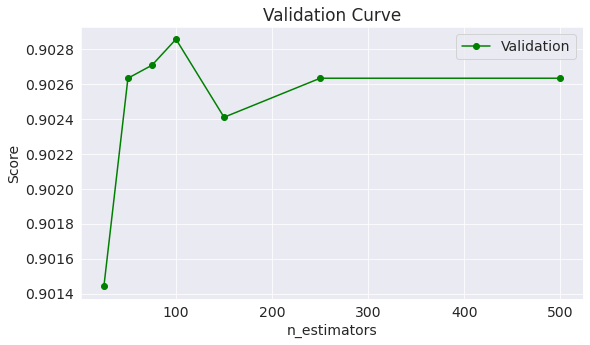

In [26]:
plot_score(test_params_Forest, 'n_estimators', [25,50,75,100,150,250,500])

We see that score is max at **n_estimators=100**

**Tuning max_depth**

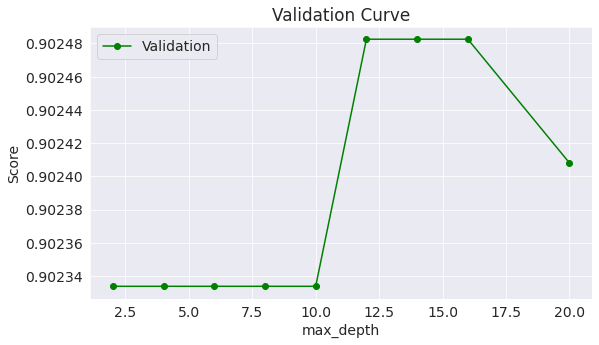

In [57]:
plot_score(test_params_Forest, 'max_depth', [2,4,6,8,10,12,14,16,20])

A max_depth **above 12** is requred for good score.

**Tuning max_features**

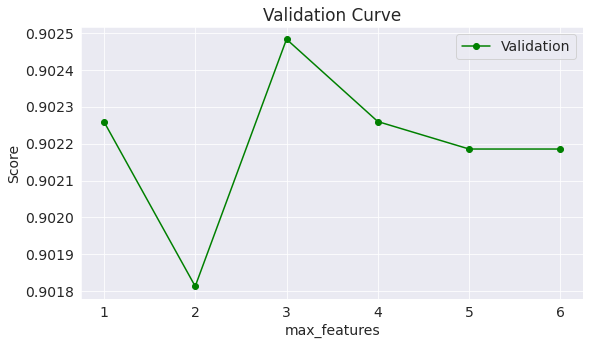

In [28]:
plot_score(test_params_Forest, 'max_features', [1,2,3,4,5,6])

We get the best score at **max_feature=3**

**Tuning the Model**

In [29]:
test_params_Forest(n_estimators=100, max_depth=12, max_features=3)

(0.9048795897130965, 0.9023338784004757)

In [25]:
test_params_Forest(n_estimators=100, max_features=3)

(0.9999442544968039, 0.9024825330756653)

### Saving the best model

In [26]:
forest = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=100, max_features=3)
forest.fit(X_train, y_train)

pickle.dump(forest, open('forest_model.sav', 'wb'))

## Feature Importance

### 1. LightGBM 

<AxesSubplot:title={'center':'Feature Importance'}, xlabel='importance', ylabel='feature'>

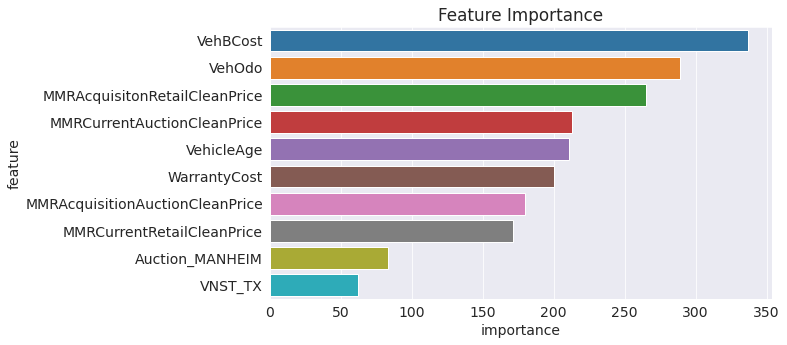

In [27]:
importance_df = pd.DataFrame(
    {'feature': X_train.columns,'importance': lgbm.feature_importances_}
    ).sort_values('importance', ascending=False)

plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature')

### 2. Random Forest

<AxesSubplot:title={'center':'Feature Importance'}, xlabel='importance', ylabel='feature'>

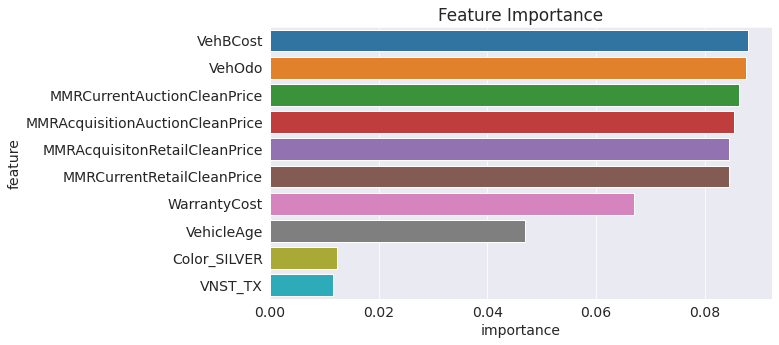

In [28]:
importance_df = pd.DataFrame(
    {'feature': X_train.columns,'importance': forest.feature_importances_}
    ).sort_values('importance', ascending=False)

plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature')

## Inference and Conclusion

Upon looking into the data we realized the following :  
1.  **The Best performing model is the Random Forest model**  
        
2.  **Both of the models assign slightly different importance to different parameters**  

3. **Class Imbalance is affecting the performance**  
The dataset has a class imbalance towards badbuy, ie. more number of data is given for badbuys than good buys. Thus we will have to use confusion matrix to get a good idea of the model's performance in all scenarios.

## References

https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/lesson/decision-trees-and-hyperparameters  
https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/lesson/random-forests-and-regularization  
https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/lesson/gradient-boosting-with-xgboost  